# A2P2: Teleportation Protocol in Q#

Implement the teleportation protocol in Q# as a series of operations which are described as follows (Tasks 1-4):
1. First, Eve needs to prepares a maximally entangled pair of qubits one of which is shared with Alice and the other with Bob. 
2. Alice then encodes the message (a qubit) that is to be sent to Bob.
3. Bob decodes the message using certain gate operations.

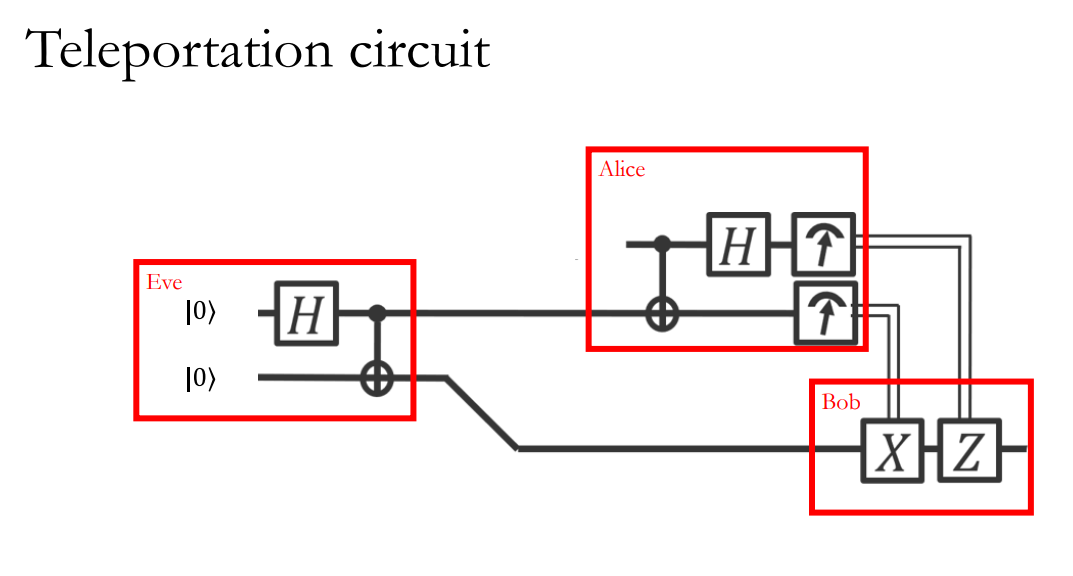



In tasks 5-8, run the protocol with different inputs and implement some modifications to the protocol.

## Task 1: Eve's task
Eve prepares a maximally entangled pair of qubits in the state $\frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$. One of these entangled qubits is given to Alice and other to Bob.

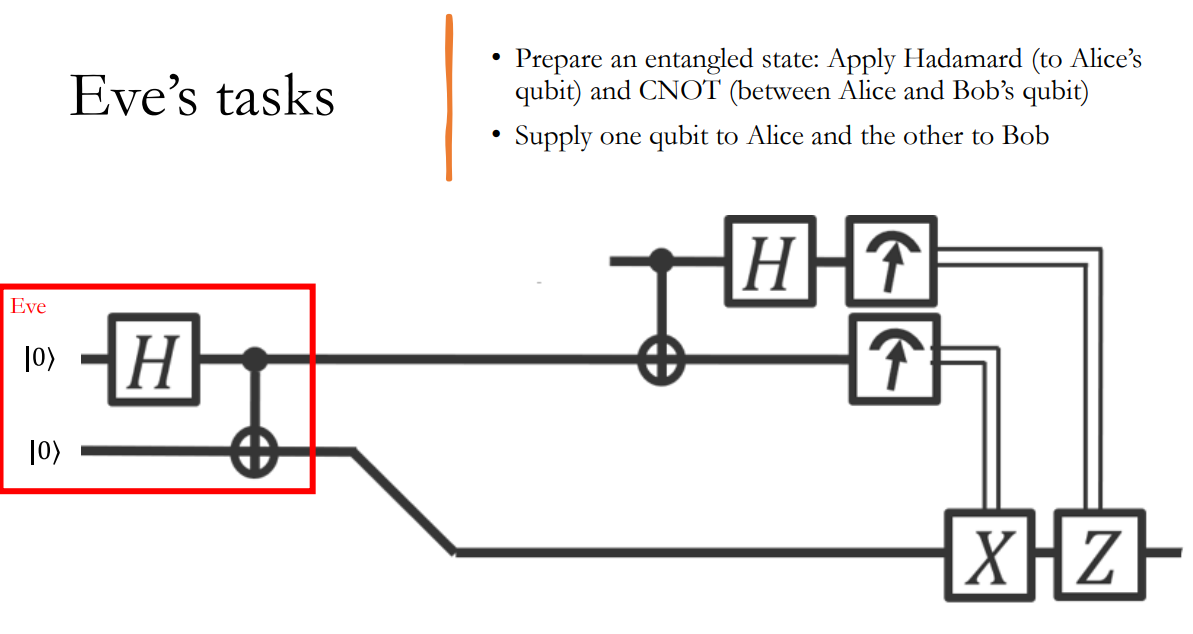

**Input**: Two qubits in the $|0\rangle$ state.

**Goal**: Create $|\phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$

In [1]:
operation Eve (q1 : Qubit, q2 : Qubit) : Unit {
    H(q1);
    CNOT(q1,q2);
}

Eve

## Task 2: Alice's task
Alice's task is to entangle the message with the entangled share qubit provided by Eve. Alice then sends then the message.

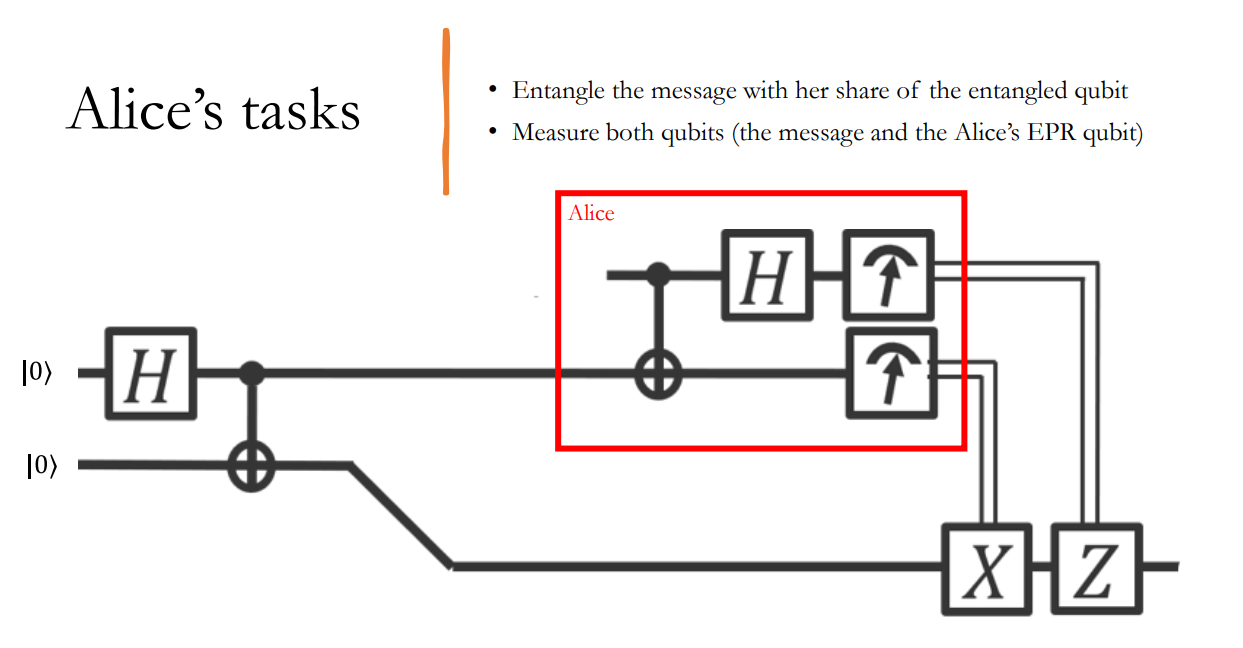

**Input**: Alice's share of the entangled pair q1, quantum bit to be teleported qInfo (q0)

**Output**: Two boolean values indicating the result of measurement. The first bit in the tuple should hold the result of measurement of the message qubit qInfo, the second bit - the result of measurement of Alice's qubit q1. Represent measurement result 'One' as true and 'Zero' as false.

In [2]:
open Microsoft.Quantum.Measurement; 

operation Alice (q1 : Qubit, qInfo : Qubit) : (Bool, Bool) {
    
    CNOT(qInfo,q1);
    H(qInfo);
    
    let result1 = M(qInfo);
    let result2 = M(q1);
    
    mutable bool1 = false;
    mutable bool2 = false;
    
    if result1 == One {
        set bool1 = true;
    }

    if result2 == One {
        set bool2 = true;
    }
    
    return (bool1,bool2);
}
 

Alice

## Task 3: Bob's task

Bob's task is to disentangle the qubit using appropriate classical gates and decode the message received from alice.

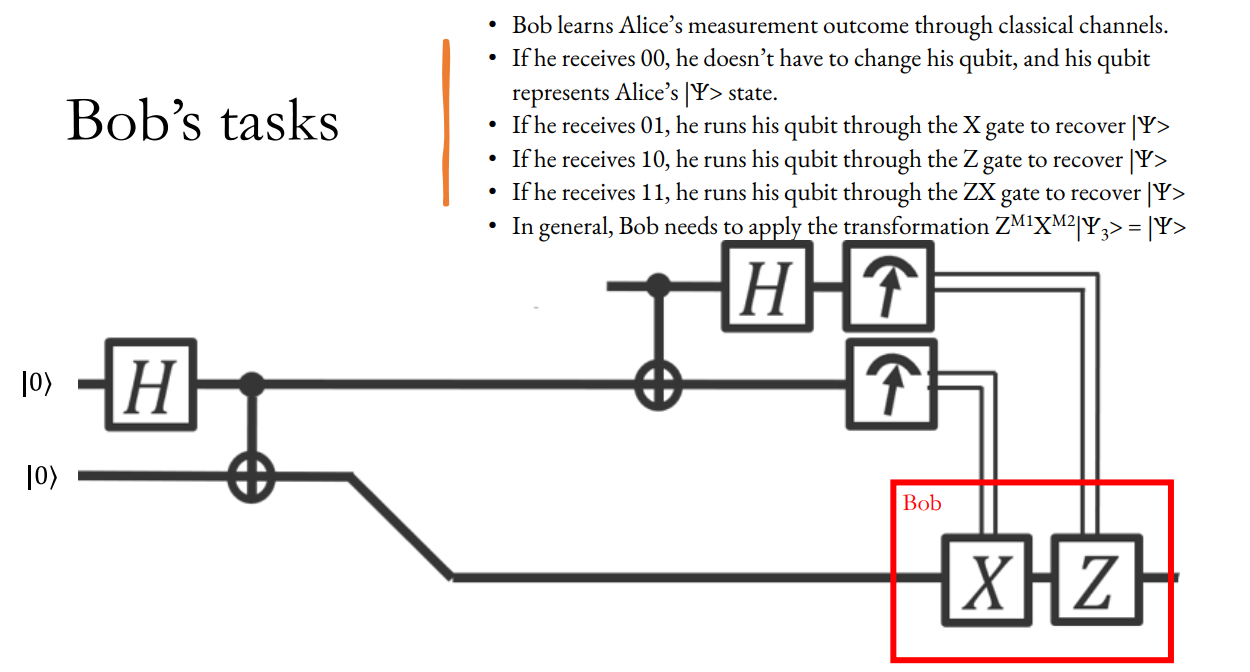

**Input**: Bob's share of the entangled pair q2, a tuple of classical bits from Alice.

**Goal**: Apply gate operations based on the tuple of classical bits from input.

In [3]:
operation Bob (q2 : Qubit, (b1 : Bool, b2 : Bool)) : Unit {
    
    if b1 == false and b2 == true{
        X(q2);
    }
    elif b1 == true and b2 == false{
        Z(q2);
    }
    elif b1 == true and b2 == true{
        X(q2);
        Z(q2);
    }
    else{
        I(q2);
    }
}

Bob

## Task 4: Standard Teleportation Protocol
Use operations 1, 2, 3 to implement the standard teleportation protocol.

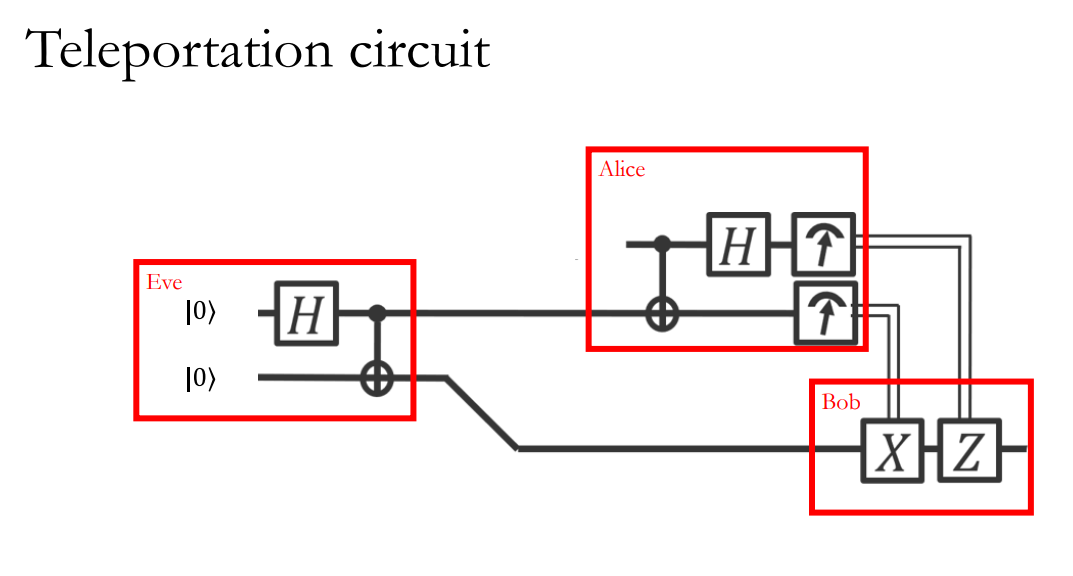

**Input**: None

**Goal**: Access Three qubits - q1, q2: for the entangled pair; qInfo (q0): the qubit to be teleported
; Implement the standard teleportation protocol

In [4]:
open Microsoft.Quantum.Diagnostics;
operation Teleportation () : Unit {
    use qInfo = Qubit();
    use q1 = Qubit();
    use q2 = Qubit();
    
    DumpMachine();
    Eve(q1,q2);
    DumpMachine();
    mutable (bool1, bool2) = Alice(q1,qInfo);
    DumpMachine();
    Bob(q2, (bool1, bool2));
    DumpMachine();
    
    Reset(qInfo);
    Reset(q1);
    Reset(q2);
} 


Teleportation

## Task 5: Teleport the following state, qInfo = $|1\rangle$
Use DumpMachine() from Microsoft.Quantum.Diagnostics to look at the resulting quantum state.

In [5]:
// Your solution here
open Microsoft.Quantum.Diagnostics;
operation Teleportation () : Unit {
    use qInfo = Qubit();
    use q1 = Qubit();
    use q2 = Qubit();
    
    X(qInfo);
    
    DumpMachine();
    Eve(q1,q2);
    DumpMachine();
    mutable (bool1, bool2) = Alice(q1,qInfo);
    DumpMachine();
    Bob(q2, (bool1, bool2));
    DumpMachine();
    
    Reset(qInfo);
    Reset(q1);
    Reset(q2);
} 

Teleportation

In [6]:
%simulate Teleportation

|0⟩	0 + 0𝑖
|1⟩	1 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|6⟩	0 + 0𝑖
|7⟩	0 + 0𝑖

|0⟩	0 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|6⟩	0 + 0𝑖
|7⟩	0.7071067811865476 + 0𝑖

|0⟩	0 + 0𝑖
|1⟩	0 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	-1 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|6⟩	0 + 0𝑖
|7⟩	0 + 0𝑖

|0⟩	0 + 0𝑖
|1⟩	0 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|6⟩	0 + 0𝑖
|7⟩	1 + 0𝑖

()

## Task 6: Teleport the following state, qInfo = $\frac{1}{\sqrt 2}(|0\rangle + |1\rangle)$
Use DumpMachine() from Microsoft.Quantum.Diagnostics to look at the resulting quantum state. Explain your results

In [7]:
// Your solution here
open Microsoft.Quantum.Diagnostics;
operation Teleportation () : Unit {
    use qInfo = Qubit();
    use q1 = Qubit();
    use q2 = Qubit();
    
    H(qInfo);
    
    DumpMachine();
    Eve(q1,q2);
    DumpMachine();
    mutable (bool1, bool2) = Alice(q1,qInfo);
    DumpMachine();
    Bob(q2, (bool1, bool2));
    DumpMachine();
    
    Reset(qInfo);
    Reset(q1);
    Reset(q2);
} 

Teleportation

In [8]:
%simulate Teleportation

|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|6⟩	0 + 0𝑖
|7⟩	0 + 0𝑖

|0⟩	0.5000000000000001 + 0𝑖
|1⟩	0.5000000000000001 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|6⟩	0.5000000000000001 + 0𝑖
|7⟩	0.5000000000000001 + 0𝑖

|0⟩	0 + 0𝑖
|1⟩	0.7071067811865475 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	-0.7071067811865475 + 0𝑖
|6⟩	0 + 0𝑖
|7⟩	0 + 0𝑖

|0⟩	0 + 0𝑖
|1⟩	0.7071067811865475 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0.7071067811865475 + 0𝑖
|6⟩	0 + 0𝑖
|7⟩	0 + 0𝑖

()

## Task 7: Teleport the following state, qInfo = $\frac{1}{\sqrt 2}(|0\rangle + i|1\rangle)$
Use DumpMachine() from Microsoft.Quantum.Diagnostics to look at the resulting quantum state. Explain your results.

In [9]:
// Your solution here
open Microsoft.Quantum.Diagnostics;
operation Teleportation () : Unit {
    use qInfo = Qubit();
    use q1 = Qubit();
    use q2 = Qubit();
    
    H(qInfo);
    S(qInfo);
    
    DumpMachine();
    Eve(q1,q2);
    DumpMachine();
    mutable (bool1, bool2) = Alice(q1,qInfo);
    DumpMachine();
    Bob(q2, (bool1, bool2));
    DumpMachine();
    
    Reset(qInfo);
    Reset(q1);
    Reset(q2);
} 

Teleportation

In [10]:
%simulate Teleportation

|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0 + 0.7071067811865476𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|6⟩	0 + 0𝑖
|7⟩	0 + 0𝑖

|0⟩	0.5000000000000001 + 0𝑖
|1⟩	0 + 0.5000000000000001𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + 0𝑖
|6⟩	0.5000000000000001 + 0𝑖
|7⟩	0 + 0.5000000000000001𝑖

|0⟩	0 + 0𝑖
|1⟩	0.7071067811865475 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + -0.7071067811865475𝑖
|6⟩	0 + 0𝑖
|7⟩	0 + 0𝑖

|0⟩	0 + 0𝑖
|1⟩	0.7071067811865475 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖
|4⟩	0 + 0𝑖
|5⟩	0 + 0.7071067811865475𝑖
|6⟩	0 + 0𝑖
|7⟩	0 + 0𝑖

()

## Task 8: What happens when the entangled pair used in Eve's task is changed to $|\psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$?
Redo 
1. Task 1 (Eve's task) to change the entangled pair to create  $|\psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$ 2. Task 3 (Bob's task) to add gates so that the qubit is recovered correctly. Explain why you are making these modifications in Bob's task. Show your work.

Implement all necessary operations below. 


In [11]:
// Your solution here